## Plot the magnetic data

In [1]:
import pandas as pd

In [2]:
import pandas as pd
triplite_data = pd.read_csv("../data/triplite_fm_energies.csv").set_index("label").sort_values("energy_fu")
df = pd.read_csv("../data/summary_data.csv", index_col='label').sort_values('e_vasp_ref')

uuid_mask = df.head(10).groupby(lambda x: x).last()['relaxed']
mask = df.relaxed.apply(lambda x: x in uuid_mask.values)
selected = df[mask][['energy_fu', 'relaxed', 'volume_fu', 'e_vasp_ref']]
# Hack 
selected.loc['mp-943492', 'relaxed'] = "3192ee81-604d-4653-a5f2-a4bf70501a75"  # Swap for the ground state of Tavorite
# Add the triplite phases
to_join = triplite_data.head(3)[['structure', 'energy_fu']]
to_join = to_join.rename(columns={'structure': 'relaxed'})
selected = selected.append(to_join)
selected = selected.rename(index={
    'LiFeSO4F triplite-ordered-5': 'LiFeSO4F-triplite_5',
    'LiFeSO4F triplite-ordered-0': 'LiFeSO4F-triplite_0',
    'LiFeSO4F triplite-ordered-14': 'LiFeSO4F-triplite_14',
    'mp-943492': 'LiFeSO4F-tavorite(MP)'

})
selected

,energy_fu,relaxed,volume_fu,e_vasp_ref
label,,,,
2LiFeSO4F-200804-034722-678938,-48.272479,b60e1513-1c6f-4ce6-af79-3981536dd19e,103.915740,0.000000
4LiFeSO4F-200804-074522-8932e9,-48.258447,3ba0f21b-4e91-4958-aad1-a4fec99d8495,104.299580,0.014032
4LiFeSO4F-200804-070941-02f116,-48.234094,f38b83a3-4e36-4c79-adbf-b72992c238f2,97.476738,0.038385
4LiFeSO4F-200804-063655-9d6304,-48.233147,60216625-0d7c-435c-b7a4-3e36802063e1,94.981354,0.039332
4LiFeSO4F-200804-055002-9fc062,-48.220242,2064057b-cc5b-4d43-be45-7d8204feb94c,93.285104,0.052237
2LiFeSO4F-200804-051350-99d823,-48.212473,fa4df8ba-4a3f-44a5-9820-a03f0c836a25,95.904383,0.060005
mp-1222389,-48.212231,2093e561-0802-418b-b143-271992ad5f83,95.373852,0.060248
LiFeSO4F-tavorite(MP),-48.209214,3192ee81-604d-4653-a5f2-a4bf70501a75,95.743087,0.063265
LiFeSO4F-triplite_5,-48.212786,ae207049-f7b7-4a53-801a-0d45b4240464,NaN,NaN


In [3]:
magnetic_df = pd.read_csv("data/magnetic_test_results.csv")

In [5]:
naming = {
    '8938': 'A',
    'f116': 'C',
    '32e9': 'B',
    'tavorite(MP)': 'Ta-I',
    '6304': 'D',
    'c062': 'E',
    'd823': 'F',
    '2389': 'Ta-II',
    'triplite_5': 'Tr-I',
    'triplite_0': 'Tr-II',
    'triplite_14': 'Tr-III'
}
def get_alias(label):
    for key, value in naming.items():
        if label.endswith(key):
            return value
    return None

## Get the extra tavorite energy

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
plt.style.use("/home/bonan/.config/matplotlib/stylelib/pulication.mplstyle")
plt.rcParams['legend.fontsize'] = 9

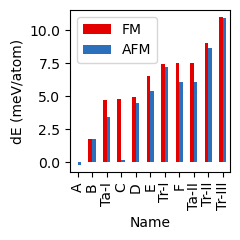

In [7]:
plot_df = magnetic_df.set_index('label')
plot_df['energy_fu'] = selected['energy_fu']

# insert revised energy for tavorite
plot_df.loc['LiFeSO4F-tavorite(MP)', 'energy_fu'] = -48.235022
plot_df.loc['LiFeSO4F-tavorite(MP)', 'relax_uuid'] = '7746676c-4993-4087-9b9d-80d45ca8a6f8'

plot_df['short_label'] = [x.split('-')[-1] for x in plot_df.index]
plot_df['energy_afm'] = (plot_df['energy'] - plot_df['energy_fu'].min()) / 8 * 1000
plot_df['energy_fm'] = (plot_df['energy_fu'] - plot_df['energy_fu'].min()) / 8 * 1000
plot_df.rename(columns={'energy_fm': 'FM', 'energy_afm': 'AFM'}, inplace=True)
plot_df.sort_values('energy_fu', inplace=True)
plot_df['alias'] = [get_alias(x) for x in plot_df.index]
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=100)
plot_df.plot.bar(x='alias', y=["FM", "AFM"], color=['xkcd:red', 'xkcd:medium blue'], ax=ax)
plt.ylabel("dE (meV/atom)")
plt.xlabel('Name')
plt.tight_layout()
plt.savefig("paper_assets/energt_diff_fm_afm.svg")
plt.savefig("paper_assets/energt_diff_fm_afm.png")
plot_df.to_csv("paper_assets/magnet_plot_data.csv")